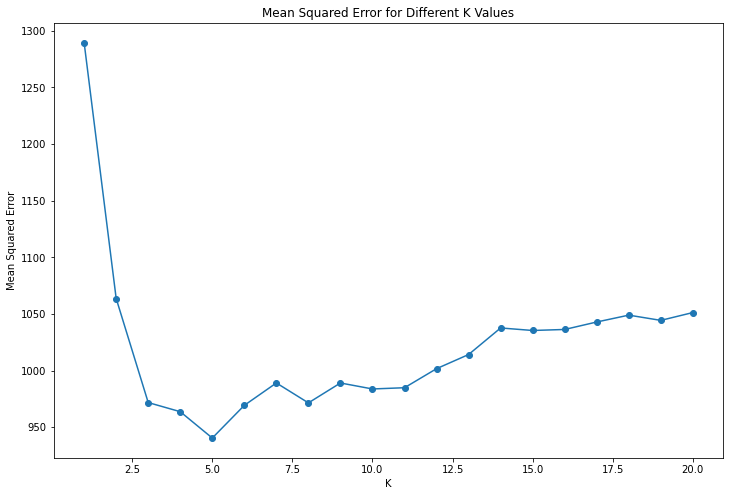

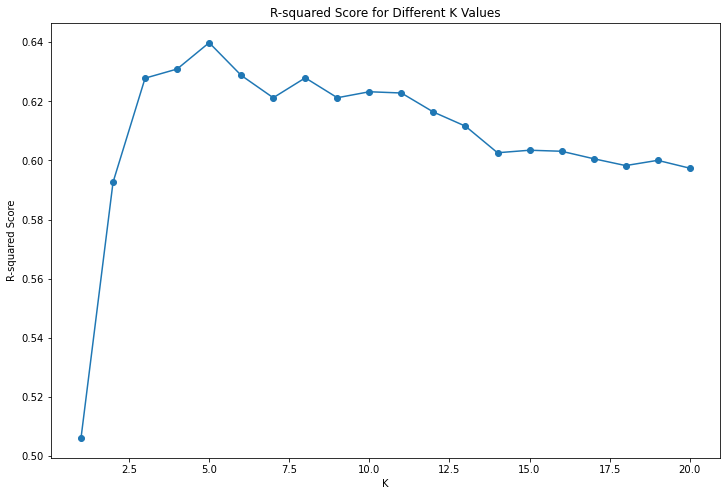

     K          MSE  R-squared
0    1  1289.480701   0.506104
1    2  1063.617659   0.592614
2    3   971.755762   0.627799
3    4   963.690270   0.630888
4    5   940.434079   0.639796
5    6   969.287351   0.628744
6    7   989.048254   0.621176
7    8   971.472568   0.627907
8    9   989.036010   0.621180
9   10   983.754853   0.623203
10  11   984.853395   0.622782
11  12  1001.670161   0.616341
12  13  1014.155108   0.611559
13  14  1037.616871   0.602573
14  15  1035.387267   0.603427
15  16  1036.288347   0.603082
16  17  1042.883046   0.600556
17  18  1048.936499   0.598237
18  19  1044.310295   0.600009
19  20  1051.222415   0.597362
Best K value: 5


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Assuming X contains the features and y contains the continuous target variable

# Load your dataset into a pandas DataFrame
data = pd.read_csv('ml_data_variable.csv')

# Separate features and target variable
# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
          'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
          'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
          'PETRO_ELECTRICPOWER, Thousand Barrels per Day']]

y = data['CO2, Million Metric Tons']

X, y = shuffle(X, y, random_state = 42)
# Split the data into training and validation sets

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Define a range of K values to test
k_values = list(range(1, 21))

# Create empty lists to store the evaluation metrics
mse_values = []
r2_values = []

# Iterate over each K value
for k in k_values:
    # Create a KNN regressor with the current K value
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the regressor to the training data
    knn.fit(X_train, y_train)
    
    # Predict the target variable for the validation set
    y_pred = knn.predict(X_val)
    
    # Calculate the mean squared error and R-squared score
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Store the evaluation metrics in the respective lists
    mse_values.append(mse)
    r2_values.append(r2)

# Find the best K value with the lowest mean squared error
best_k = k_values[np.argmin(mse_values)]

# Plot the mean squared error
plt.figure(figsize=(12, 8))  # Specify the width and height in inches
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different K Values')
plt.show()

# Plot the R-squared score
plt.figure(figsize=(12, 8))  # Specify the width and height in inches
plt.plot(k_values, r2_values, marker='o')
plt.xlabel('K')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different K Values')
plt.show()

# Display the results
results = pd.DataFrame({'K': k_values, 'MSE': mse_values, 'R-squared': r2_values})
print(results)

print("Best K value:", best_k)
